In [58]:
import numpy as np
import pandas as pd

mandarine_consume = pd.read_excel('predict_consume2.xlsx', index_col='년도')
mandarine_consume
mandarine_consume.describe()
mandarine_consume.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1985 to 2019
Data columns (total 24 columns):
 귤도매가격            24 non-null float64
귤소매가격             27 non-null float64
오렌지도매가격           22 non-null float64
오렌지소매가격           22 non-null float64
사과도매가격            24 non-null float64
배도매가격             24 non-null float64
딸기도매가격            24 non-null float64
감도매가격             24 non-null float64
바나나도매가격           24 non-null float64
참다래도매가격(수입)       24 non-null float64
포도도매가격            24 non-null float64
생산자물가지수(감귤)       35 non-null float64
소비자물가지수(감귤)       35 non-null float64
1인당 가처분소득         26 non-null float64
1인당 연간소비량(kg)     21 non-null float64
gdp_deflator      26 non-null float64
과일류 1인당 연간 소비량    22 non-null float64
1인가구비율            19 non-null float64
수입개방화(신선)         10 non-null float64
수입개방화(가공)         10 non-null float64
수입량(톤)            10 non-null float64
수입액(천달러)          10 non-null float64
수입량(톤).1          11 non-null float64
수입액(천달러).1        

In [59]:
mandarine_consume.columns = ['mand_whole_price', 'mand_retail_price', 'orange_whole_price', 'orange_retail_price',
                             'apple_whole_price', 'pear_whole_price', 'strberry_whole_price', 'persimon_whole_price',
                             'banana_whole_price','kiwi_whole_price', 'graph_whole_price',
                            'product_index', 'consumer_index', 'per_person_income', 'per_person_consume_kg', 'gpd_deflator',
                            'per_person_fruit_kg','alone_house_ratio','fresh_import','product_import','import_ton',
                            'import_dollar','import_ton2', 'import_dollar2']

In [60]:
# y를 평균으로 채운 것 per_person_consume_kg_fillmean / 아닌건 per_person_consume_kg
median = mandarine_consume['per_person_consume_kg'].median()
mean = mandarine_consume['per_person_consume_kg'].mean()
mean
mandarine_consume['per_person_consume_kg_fillmean'] = mandarine_consume['per_person_consume_kg'].fillna(mean)
mandarine_consume['per_person_consume_kg_fillmean']

년도
1985     9.100000
1986    12.833333
1987    12.833333
1988    12.833333
1989    12.833333
1990    11.500000
1991    12.833333
1992    12.833333
1993    12.833333
1994    12.833333
1995    13.600000
1996    12.833333
1997    12.833333
1998    12.833333
1999    12.833333
2000    11.900000
2001    12.833333
2002    13.300000
2003    13.000000
2004    12.000000
2005    13.100000
2006    12.700000
2007    16.000000
2008    13.000000
2009    15.200000
2010    12.400000
2011    13.600000
2012    13.700000
2013    13.400000
2014    14.200000
2015    12.500000
2016    11.900000
2017    11.600000
2018    11.800000
2019    12.833333
Name: per_person_consume_kg_fillmean, dtype: float64

In [61]:
mandarine_consume['fresh_import'] = mandarine_consume['fresh_import'].fillna(method='ffill')
mandarine_consume['fresh_import'] = mandarine_consume['fresh_import'].fillna(0)
mandarine_consume['product_import'] = mandarine_consume['product_import'].fillna(method='ffill')
mandarine_consume['product_import'] = mandarine_consume['product_import'].fillna(0)

In [62]:
drop_columns = ['import_ton', 'import_dollar', 'import_ton2', 'import_dollar2', 'alone_house_ratio', 'per_person_fruit_kg']
mandarine_consume_df = mandarine_consume.drop(columns=drop_columns)

In [63]:
mandarine_consume_df = mandarine_consume_df.dropna()
mandarine_consume_df

,mand_whole_price,mand_retail_price,orange_whole_price,orange_retail_price,apple_whole_price,pear_whole_price,strberry_whole_price,persimon_whole_price,banana_whole_price,kiwi_whole_price,graph_whole_price,product_index,consumer_index,per_person_income,per_person_consume_kg,gpd_deflator,fresh_import,product_import,per_person_consume_kg_fillmean
년도,,,,,,,,,,,,,,,,,,,
2000,7417.333333,11800.000000,14240.000000,52580.0,17460.0,14560.0,26330.0,10600.0,8610.0,32130.0,1571.0,58.74,55.410,61964.6448,11.9,72.119,0.0,0.0,11.9
2002,5312.000000,8866.666667,22410.000000,63440.0,27500.0,16510.0,34850.0,18000.0,11390.0,30640.0,2127.0,84.83,84.325,75338.7816,13.3,76.892,0.0,0.0,13.3
2003,9075.000000,26300.000000,17700.000000,56280.0,22660.0,14620.0,43200.0,17590.0,10660.0,33510.0,2561.0,57.45,63.620,82105.3168,13.0,79.544,0.0,0.0,13.0
2004,12609.000000,27000.000000,18720.000000,58280.0,36010.0,26480.0,43380.0,19540.0,10310.0,35080.0,3220.0,96.77,85.198,90825.8304,12.0,82.032,0.0,0.0,12.0
2005,12133.000000,16500.000000,16700.000000,63520.0,41280.0,19550.0,49150.0,22930.0,9880.0,35050.0,2849.0,143.35,106.735,95684.7528,13.1,82.887,0.0,0.0,13.1
2006,13026.000000,31800.000000,18650.000000,63380.0,30310.0,13420.0,46880.0,18750.0,10400.0,31220.0,3099.0,100.05,84.334,99341.6424,12.7,82.702,0.0,0.0,12.7
2007,7101.000000,13100.000000,23090.000000,70610.0,30950.0,22210.0,59720.0,21370.0,10780.0,30700.0,2902.0,157.50,109.137,107368.2552,16.0,84.702,0.0,0.0,16.0
2008,12719.000000,22100.000000,19320.000000,60350.0,29200.0,13370.0,59920.0,17860.0,12830.0,32550.0,3165.0,59.02,67.663,116943.7992,13.0,87.096,1.6,1.4,13.0
2009,11353.000000,19300.000000,27400.000000,80370.0,30960.0,18680.0,58650.0,20750.0,15830.0,37830.0,2607.0,73.20,93.346,124746.3936,15.2,90.239,1.6,1.4,15.2


In [64]:
# 도매가격 명목가격에서 실질가격으로 변환
mandarine_consume_df['mandarin'] = mandarine_consume_df['mand_whole_price'] / mandarine_consume_df['product_index']
mandarine_consume_df['orange'] = mandarine_consume_df['orange_whole_price'] / mandarine_consume_df['product_index']
mandarine_consume_df['apple'] = mandarine_consume_df['apple_whole_price'] / mandarine_consume_df['product_index']
mandarine_consume_df['pear'] = mandarine_consume_df['pear_whole_price'] / mandarine_consume_df['product_index']
mandarine_consume_df['strberry'] = mandarine_consume_df['strberry_whole_price'] / mandarine_consume_df['product_index']
mandarine_consume_df['persimon'] = mandarine_consume_df['persimon_whole_price'] / mandarine_consume_df['product_index']
mandarine_consume_df['banana'] = mandarine_consume_df['banana_whole_price'] / mandarine_consume_df['product_index']
mandarine_consume_df['kiwi'] = mandarine_consume_df['kiwi_whole_price'] / mandarine_consume_df['product_index']
mandarine_consume_df['graph'] = mandarine_consume_df['graph_whole_price'] / mandarine_consume_df['product_index']
# 가처분소득도 GDP디플레이터
mandarine_consume_df['per_person_income_N'] = mandarine_consume_df['per_person_income'] / mandarine_consume_df['gpd_deflator']

In [65]:
# 과일 도매가격 중심으로 확인하기 위해서 서브 데이터프레임 생성
cols_fruit = ['mandarin', 'orange', 'apple', 'pear', 'strberry', 'persimon', 'banana', 'kiwi',
              'graph', 'per_person_income_N','per_person_consume_kg']
mandarine_consume_df_final = mandarine_consume_df[cols_fruit]
mandarine_consume_df_final

,mandarin,orange,apple,pear,strberry,persimon,banana,kiwi,graph,per_person_income_N,per_person_consume_kg
년도,,,,,,,,,,,
2000,126.273976,242.424242,297.242084,247.871978,448.246510,180.456248,146.578141,546.986721,26.744978,859.2,11.9
2002,62.619356,264.175410,324.177767,194.624543,410.821643,212.189084,134.268537,361.192974,25.073677,979.8,13.3
2003,157.963446,308.093995,394.429939,254.482158,751.958225,306.179286,185.552654,583.289817,44.577894,1032.2,13.0
2004,130.298646,193.448383,372.119459,273.638524,448.279425,201.922083,106.541283,362.509042,33.274775,1107.2,12.0
2005,84.638995,116.498082,287.966516,136.379491,342.867108,159.958144,68.922218,244.506453,19.874433,1154.4,13.1
2006,130.194903,186.406797,302.948526,134.132934,468.565717,187.406297,103.948026,312.043978,30.974513,1201.2,12.7
2007,45.085714,146.603175,196.507937,141.015873,379.174603,135.682540,68.444444,194.920635,18.425397,1267.6,16.0
2008,215.503219,327.346662,494.747543,226.533379,1015.249068,302.609285,217.383938,551.507963,53.625890,1342.7,13.0
2009,155.095628,374.316940,422.950820,255.191257,801.229508,283.469945,216.256831,516.803279,35.614754,1382.4,15.2


In [66]:
# 종속변수 / 독립변수 지정
X = mandarine_consume_df_final.iloc[:,:-1]
X
y = mandarine_consume_df_final.iloc[:,-1]

C:\Users\ICT01_13\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


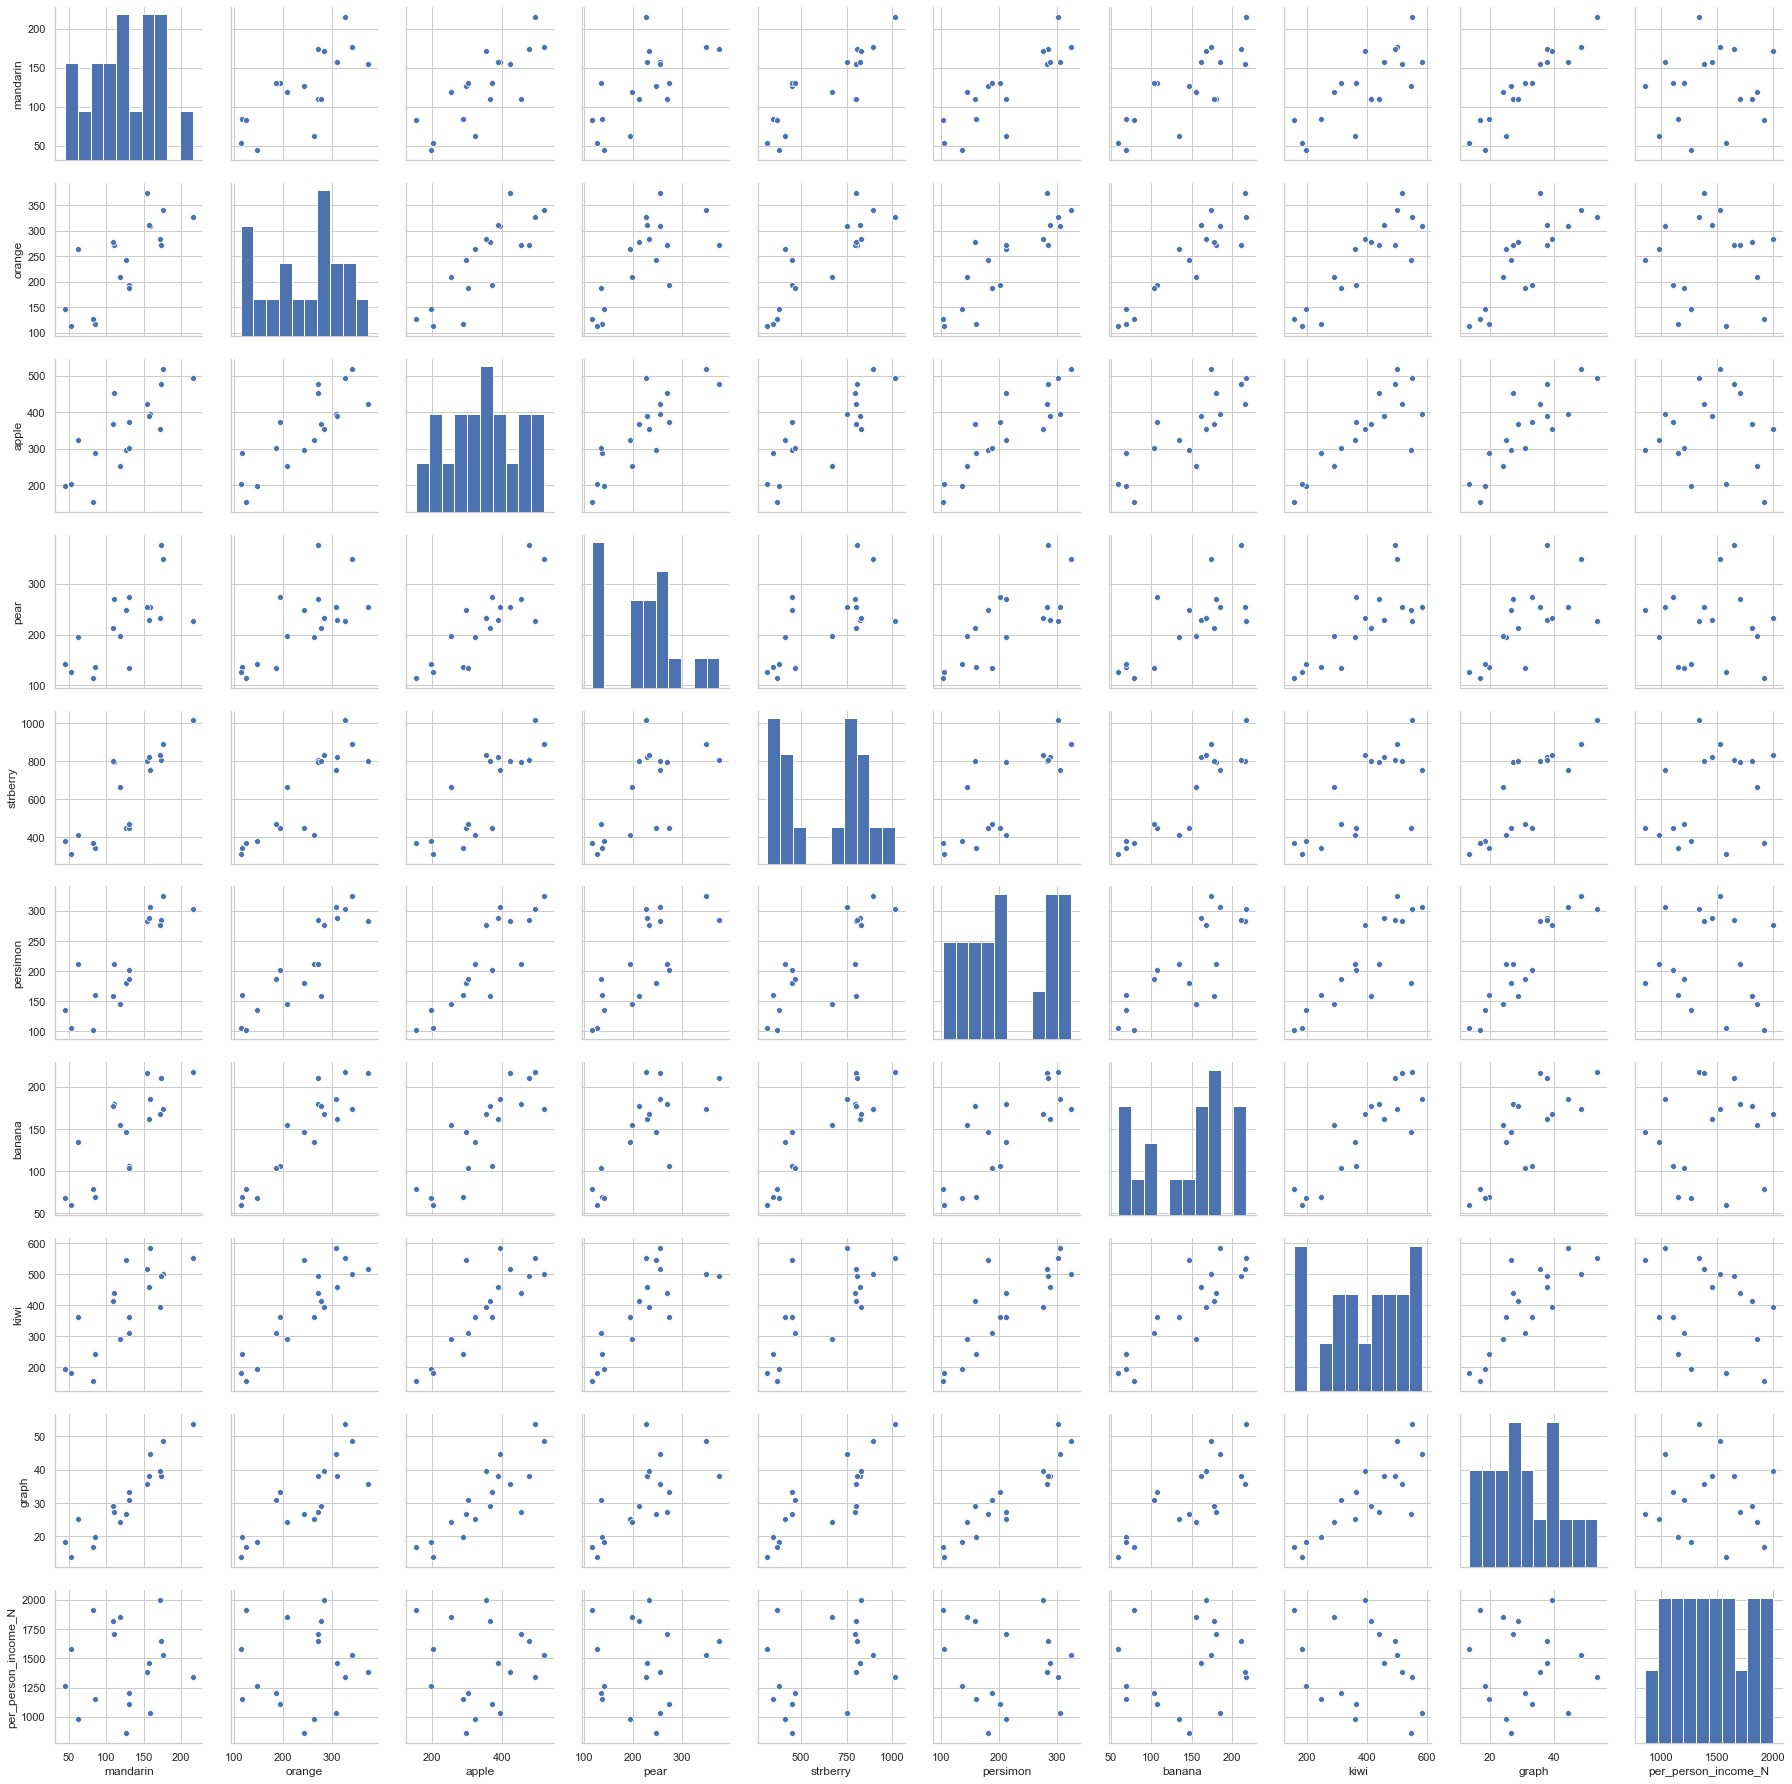

C:\Users\ICT01_13\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\ICT01_13\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\ICT01_13\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\ICT01_13\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\ICT01_13\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcpara

In [56]:
# 페어플롯
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
sns.pairplot(X, height=2.5)
plt.show()
sns.reset_orig()

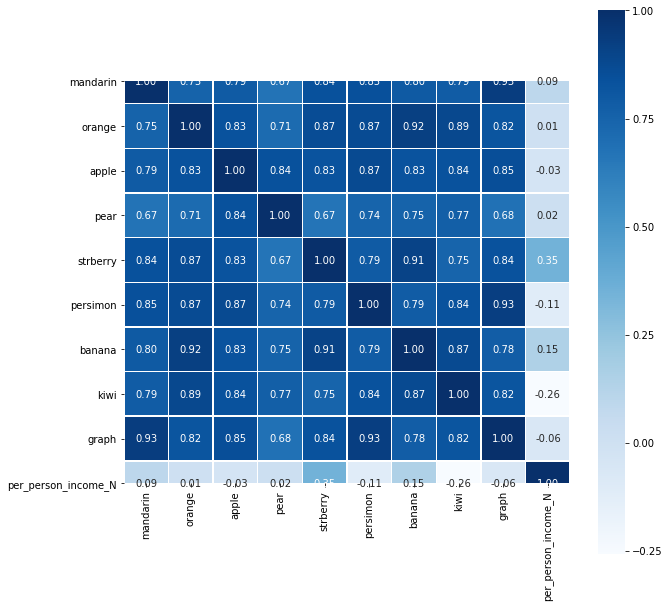

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(data=X.corr(), annot=True, square=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.show()

# 다중공선성이 미쳤엉.... 음냐

In [67]:
# 정규화 4가지 버전
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale, StandardScaler
scale_X = scale(X)
robust_X = robust_scale(X)
minmax_X = minmax_scale(X)
maxabs_X = maxabs_scale(X)
scaler = StandardScaler()
stdScale_X = scaler.fit(X)

In [68]:
# test / train set 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(minmax_X, y, random_state=0)  

In [69]:
# model1. 최소자승법
import statsmodels.api as sm
result = sm.OLS(y_train, X_train).fit()
result.summary()
ols_predict = result.predict(X_test)

C:\Users\ICT01_13\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     per_person_consume_kg   R-squared (uncentered):                   0.991
Model:                               OLS   Adj. R-squared (uncentered):              0.963
Method:                    Least Squares   F-statistic:                              34.95
Date:                   Tue, 21 Jan 2020   Prob (F-statistic):                     0.00694
Time:                           15:39:05   Log-Likelihood:                         -20.498
No. Observations:                     13   AIC:                                      61.00
Df Residuals:                          3   BIC:                                      66.65
Df Model:                             10                                                  
Covariance Type:               nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9893     13.560     -0.073      0.946     -44.143      42.164
x2            -7.8229     21.957     -0.356      0.745     -77.700      62.054
x3            15.3574      9.374      1.638      0.200     -14.474      45.189
x4           -10.3195      8.051     -1.282      0.290     -35.941      15.302
x5           -15.6220     26.374     -0.592      0.595     -99.556      68.312
x6            -1.2236      9.623     -0.127      0.907     -31.847      29.400
x7            -3.1028     21.538     -0.144      0.895     -71.645      65.439
x8            22.0390     18.300      1.204      0.315     -36.201      80.279
x9             3.8917     15.591      0.250      0.819     -45.727      53.511
x10           15.7056      3.025      5.191      0.014       6.077      25.334
==============================================================================
Omnibus:                        0.341   Durbin-Watson:                   2.283
Prob(Omnibus):                  0.843   Jarque-Bera (JB):                0.273
Skew:                           0.282   Prob(JB):                        0.872
Kurtosis:                       2.567   Cond. No.                         109.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# model2. linear regression
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression(fit_intercept = True)
lr_model = lr_model.fit(X_train, y_train)

In [76]:
print(lr_model.coef_)
print(lr_model.intercept_)
lr_predict = lr_model.predict(X_test)
r2 = ((y_test - lr_predict)**2).sum()
lr_score = lr_model.score(X_test, y_test)
print(lr_score)

[-5.9790752  -3.60129379  4.37643039 -2.54564231 -1.09395184  1.82923439
  3.24315145  1.44056739  1.16221104  0.89535745]
12.18023190546379
-1.1756393441008304


In [75]:
# model2-1. linear regression with regulation

17.98818609702566

In [77]:
# model3. support vector regressor

from sklearn.svm import SVR
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(y_test)


C:\Users\ICT01_13\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
# model4. 

-0.17811751230731532

In [ ]:
fresh_import
per_person_consume_kg


In [79]:
mandarine_consume_df.columns

['mand_whole_price', 'mand_retail_price', 'orange_whole_price',
       'orange_retail_price', 'apple_whole_price', 'pear_whole_price',
       'strberry_whole_price', 'persimon_whole_price', 'banana_whole_price',
       'kiwi_whole_price', 'graph_whole_price', 'product_index',
       'consumer_index', 'per_person_income', 'per_person_consume_kg',
       'gpd_deflator', 'fresh_import', 'product_import',
       'per_person_consume_kg_fillmean', 'mandarin', 'orange', 'apple', 'pear',
       'strberry', 'persimon', 'banana', 'kiwi', 'graph',
       'per_person_income_N'],

Index(['mand_whole_price', 'mand_retail_price', 'orange_whole_price',
       'orange_retail_price', 'apple_whole_price', 'pear_whole_price',
       'strberry_whole_price', 'persimon_whole_price', 'banana_whole_price',
       'kiwi_whole_price', 'graph_whole_price', 'product_index',
       'consumer_index', 'per_person_income', 'per_person_consume_kg',
       'gpd_deflator', 'fresh_import', 'product_import',
       'per_person_consume_kg_fillmean', 'mandarin', 'orange', 'apple', 'pear',
       'strberry', 'persimon', 'banana', 'kiwi', 'graph',
       'per_person_income_N'],
      dtype='object')

In [80]:
sub_col2 = ['per_person_consume_kg', 'fresh_import', 'product_import','mandarin', 'orange', 'apple', 'pear',
       'strberry', 'persimon', 'banana', 'kiwi', 'graph','per_person_income_N']
mandarine_consume_df_sub2 = mandarine_consume_df[sub_col2]
mandarine_consume_df_sub2

,per_person_consume_kg,fresh_import,product_import,mandarin,orange,apple,pear,strberry,persimon,banana,kiwi,graph,per_person_income_N
년도,,,,,,,,,,,,,
2000,11.9,0.0,0.0,126.273976,242.424242,297.242084,247.871978,448.246510,180.456248,146.578141,546.986721,26.744978,859.2
2002,13.3,0.0,0.0,62.619356,264.175410,324.177767,194.624543,410.821643,212.189084,134.268537,361.192974,25.073677,979.8
2003,13.0,0.0,0.0,157.963446,308.093995,394.429939,254.482158,751.958225,306.179286,185.552654,583.289817,44.577894,1032.2
2004,12.0,0.0,0.0,130.298646,193.448383,372.119459,273.638524,448.279425,201.922083,106.541283,362.509042,33.274775,1107.2
2005,13.1,0.0,0.0,84.638995,116.498082,287.966516,136.379491,342.867108,159.958144,68.922218,244.506453,19.874433,1154.4
2006,12.7,0.0,0.0,130.194903,186.406797,302.948526,134.132934,468.565717,187.406297,103.948026,312.043978,30.974513,1201.2
2007,16.0,0.0,0.0,45.085714,146.603175,196.507937,141.015873,379.174603,135.682540,68.444444,194.920635,18.425397,1267.6
2008,13.0,1.6,1.4,215.503219,327.346662,494.747543,226.533379,1015.249068,302.609285,217.383938,551.507963,53.625890,1342.7
2009,15.2,1.6,1.4,155.095628,374.316940,422.950820,255.191257,801.229508,283.469945,216.256831,516.803279,35.614754,1382.4


In [83]:
y = mandarine_consume_df_sub2.iloc[:, 0]
X = mandarine_consume_df_sub2.iloc[:, 1:]

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_X.fit_transform(y)

from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)
y_pred = regressor.predict()

,fresh_import,product_import,mandarin,orange,apple,pear,strberry,persimon,banana,kiwi,graph,per_person_income_N
년도,,,,,,,,,,,,
2000,0.0,0.0,126.273976,242.424242,297.242084,247.871978,448.246510,180.456248,146.578141,546.986721,26.744978,859.2
2002,0.0,0.0,62.619356,264.175410,324.177767,194.624543,410.821643,212.189084,134.268537,361.192974,25.073677,979.8
2003,0.0,0.0,157.963446,308.093995,394.429939,254.482158,751.958225,306.179286,185.552654,583.289817,44.577894,1032.2
2004,0.0,0.0,130.298646,193.448383,372.119459,273.638524,448.279425,201.922083,106.541283,362.509042,33.274775,1107.2
2005,0.0,0.0,84.638995,116.498082,287.966516,136.379491,342.867108,159.958144,68.922218,244.506453,19.874433,1154.4
2006,0.0,0.0,130.194903,186.406797,302.948526,134.132934,468.565717,187.406297,103.948026,312.043978,30.974513,1201.2
2007,0.0,0.0,45.085714,146.603175,196.507937,141.015873,379.174603,135.682540,68.444444,194.920635,18.425397,1267.6
2008,1.6,1.4,215.503219,327.346662,494.747543,226.533379,1015.249068,302.609285,217.383938,551.507963,53.625890,1342.7
2009,1.6,1.4,155.095628,374.316940,422.950820,255.191257,801.229508,283.469945,216.256831,516.803279,35.614754,1382.4
